In [ ]:
import sys
sys.path.insert(1, '../')
import os

from AnalyzeTFSF import full_analysis, animate_results, pipeline_analysis_to_TF


/home/bq_llettermann/.conda/envs/JAX22GPU/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
DATA_REPO = '/bwSDS/sd23l003/llettermann/ChiralityPaperData/DataRepository/'

In [3]:
filepath = os.path.join(DATA_REPO, 'Two_Sided_Traction_Force', 'Example_Dataset', '20241008 sandwich traction force 8,67kDa RG.mvd2')
outpath = os.path.join(DATA_REPO, 'Two_Sided_Traction_Force', 'Example_Dataset', 'Outputs')
series = 12

Frame 199: 7744 trajectories present.


/home/bq_llettermann/PhD/Paper/Chirality/GitCode/hei-sporo-code-tracking/TractionForce/AnalyzeTFSF.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track2id['particle'] = pairmap[track2id['particle'].values]


Forward complete 0
Backward complete 0
Forward complete 1
Backward complete 1
Forward complete 2
Backward complete 2
0 Labels Added
27 16
Forward complete 0
Backward complete 0
Forward complete 1
Backward complete 1
Forward complete 2
Backward complete 2
0 Labels Added
25 16


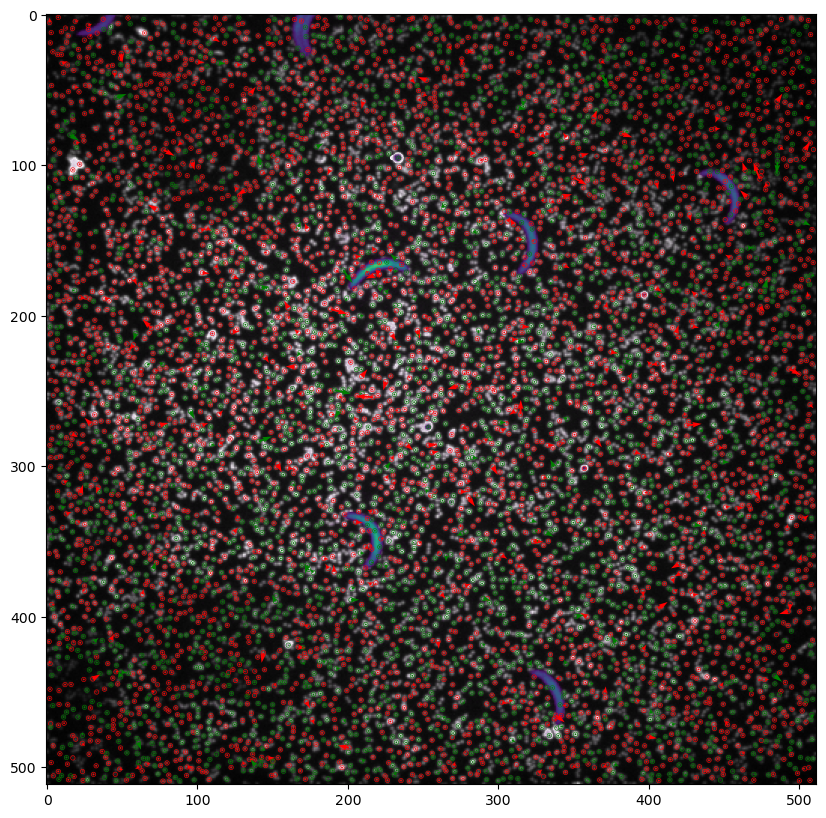

In [4]:
# Track sporozoites and beads in a microscopy series
resdict = full_analysis(filepath, os.path.join(outpath,f'{series:02d}_data.npy'), series=series, returning=True)
frames_1, frames_2, sporo, beadmean1, beadmean2, disp1_sm, disp2_sm = resdict['frames_1'], resdict['frames_2'], resdict['sporo'], resdict['beadmean1'], resdict['beadmean2'], resdict['disp1_sm'], resdict['disp2_sm']
animate_results(frames_1, frames_2, sporo, beadmean1, beadmean2, disp1_sm, disp2_sm, savefile=os.path.join(outpath,f'{series:02d}_animation.mp4'))

In [5]:
# Analyze the saved data file:
trackrespath = os.path.join(outpath, f'{series:02d}_data.npy')
pipeline_analysis_to_TF(trackrespath,
                        filename = 'Example_Dataset', 
                        plotoutpath = outpath+'/', 
                        saveoutpath = outpath+'/')

/home/bq_llettermann/PhD/Paper/Chirality/GitCode/hei-sporo-code-tracking/TractionForce/AnalyzeTFSF.py:642: RuntimeWarning: invalid value encountered in divide
  selector = (f1larger-f2larger)/(np.logical_not(np.isnan(intgather).any(axis=1)).sum(axis=1))
/home/bq_llettermann/PhD/Paper/Chirality/GitCode/hei-sporo-code-tracking/TractionForce/AnalyzeTFSF.py:210: RuntimeWarning: All-NaN slice encountered
  bead_sporo_dist1 = np.array([np.nanmin(np.linalg.norm(traj[:,f][None]-np.stack(np.where(labeled[f,0]>0), axis=-1)[:,None],axis=-1), axis=0) for f in range(len(labeled))]).T


Unidentified pair 9, partners [], counts []


/home/bq_llettermann/PhD/Paper/Chirality/GitCode/hei-sporo-code-tracking/TractionForce/AnalyzeTFSF.py:263: RuntimeWarning: invalid value encountered in divide
  tb_step = tb_step/np.linalg.norm(tb_step, axis=-1)[:,:,None]
/home/bq_llettermann/PhD/Paper/Chirality/GitCode/hei-sporo-code-tracking/TractionForce/AnalyzeTFSF.py:311: RuntimeWarning: invalid value encountered in divide
  disp_vecs = d_here/np.linalg.norm(d_here, axis=-1)[:,:,None]


Clockwise scores differ by more than 50% [2.93299395e-02 1.90638871e-01 7.05040365e-04 2.17865443e-02
 1.11644135e-02 2.28798712e-02 2.47580607e-01 1.25154984e+00
 2.39950263e-02 3.10595204e-01]
Sporolength: 48.14164529482911  Len per f: 2.4070822647414554
`xtol` termination condition is satisfied.
Number of iterations: 72, function evaluations: 70, CG iterations: 653, optimality: 4.30e-07, constraint violation: 0.00e+00, execution time:  4.2 s.
0.0011514098228225787
Sporolength: 44.361615560275865  Len per f: 2.2180807780137934
`xtol` termination condition is satisfied.
Number of iterations: 107, function evaluations: 104, CG iterations: 536, optimality: 8.75e-08, constraint violation: 0.00e+00, execution time:  7.0 s.
0.0008097614668307544
Sporolength: 44.669525239035416  Len per f: 2.233476261951771
`gtol` termination condition is satisfied.
Number of iterations: 31, function evaluations: 28, CG iterations: 887, optimality: 6.72e-13, constraint violation: 0.00e+00, execution time:  

([Array(0.41120526, dtype=float64),
  Array(-0.33195297, dtype=float64),
  Array(-0.12256872, dtype=float64),
  Array(0.20990853, dtype=float64)],
 [Array(-0.43502942, dtype=float64),
  Array(0.34931411, dtype=float64),
  Array(0.13793257, dtype=float64),
  Array(-0.19241344, dtype=float64)],
 [0.8499649571557099,
  -0.9325265428715201,
  -0.9302307936858103,
  0.6956624166166923])